# **2. Low Rank Approximation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

%matplotlib inline 

# Part a)

In [2]:
def low_rank_approximation(X, rank):
    u, s, vh = np.linalg.svd(X, full_matrices=False)
    s[rank:] = 0
    s = np.diag(s)
    return np.dot(np.dot(u, s), vh)

In [3]:
face = imread("./data/face.jpg")
approx = []
for rank in [5, 20, 100]:
    approx.append(low_rank_approximation(face, rank))
approx.append(face)

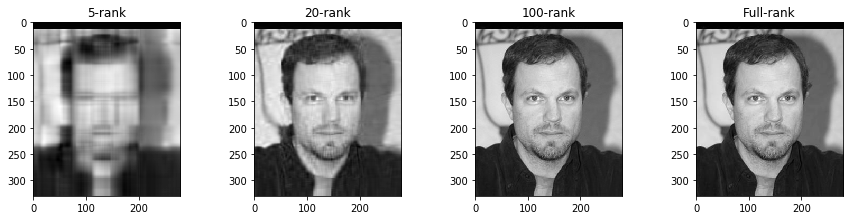

In [4]:
titles = ['5', '20', '100', 'Full']
fig, axes = plt.subplots(nrows=1, ncols=4, gridspec_kw = {'wspace' : .5, 'right' : 2})
for i in range(4):
    axes[i].set_title(titles[i] + '-rank')
    axes[i].imshow(approx[i], cmap = 'gray')
    
plt.show()

# Part b)

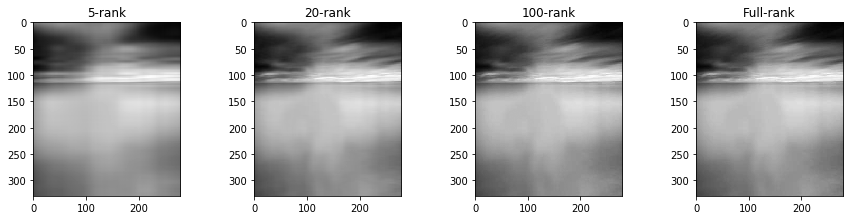

In [5]:
sky = imread("./data/sky.jpg")
approx = []
for rank in [5, 20, 100]:
    approx.append(low_rank_approximation(sky, rank))
approx.append(sky)
titles = ['5', '20', '100', 'Full']
fig, axes = plt.subplots(nrows=1, ncols=4, gridspec_kw = {'wspace' : .5, 'right' : 2})
for i in range(4):
    axes[i].set_title(titles[i] + '-rank')
    axes[i].imshow(approx[i], cmap = 'gray')
    
plt.show()

# Part c)

In [6]:
def mse(img1, img2): 
    #return np.sum((img1 - img2)**2)
    return np.linalg.norm(img1-img2)

In [7]:
mse_face = []
mse_sky = []
ks = list(range(1, 101))
for k in ks:
    mse_face.append(mse(low_rank_approximation(face, k), face))
    mse_sky.append(mse(low_rank_approximation(sky, k), sky))

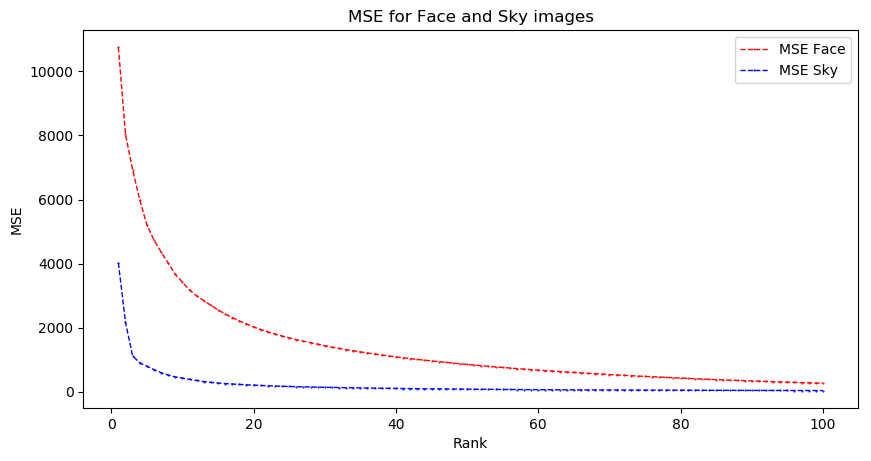

In [8]:
fig = plt.figure()
fig.set_size_inches(10, 5)
fig.set_dpi(100)
plt.subplot(1, 1, 1)
plt.plot(ks, mse_face, label="MSE Face", color='r', marker='.', linestyle='dashed',linewidth=1, markersize=1)
plt.plot(ks, mse_sky, label="MSE Sky", color='b', marker='.', linestyle='dashed',linewidth=1, markersize=1)
plt.legend()
plt.title("MSE for Face and Sky images")
plt.xlabel("Rank")
plt.ylabel("MSE")
plt.show()

# Part d)

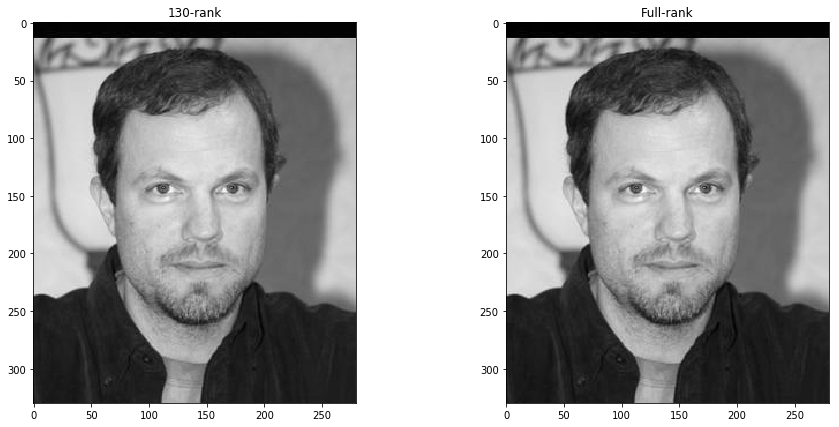

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'wspace' : 0, 'right' : 2}, figsize= (7,7))
rank = 130
axes[0].imshow(low_rank_approximation(face, rank), cmap = 'gray')
axes[0].set_title(str(rank) + '-rank')
axes[1].imshow(face, cmap = 'gray')
axes[1].set_title('Full-rank')
plt.show()

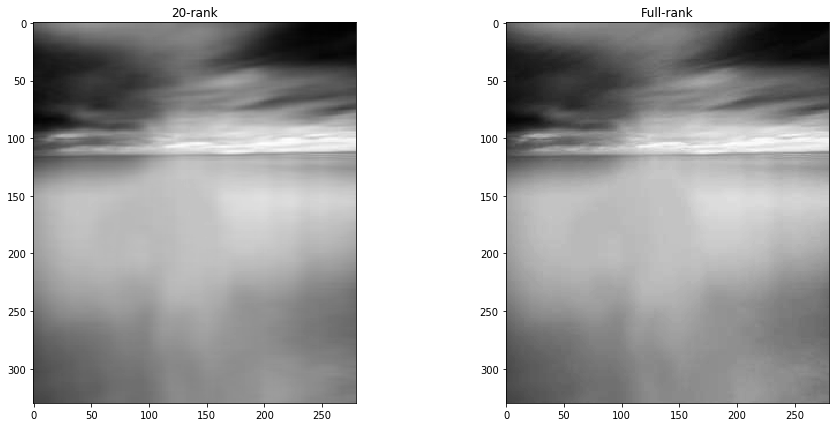

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'wspace' : 0, 'right' : 2}, figsize = (7,7))
rank = 20
axes[0].imshow(low_rank_approximation(sky, rank), cmap = 'gray')
axes[0].set_title(str(rank) + '-rank')
axes[1].imshow(sky, cmap = 'gray')
axes[1].set_title('Full-rank')
plt.show()

## Written Answer 

**For Face:** Around rank 20 we can make out a fairly blurry yet reasonable recreation of the original with a fair bit of noise. Around rank 30 we can even make out many details within the facial expression itself; however, there's still a lot of distortion/noise throughout. Moving up to 40 the image looks almost identical to the original with a bit of graininess. At this point moving up in rank seems to give less and less clarity as the image is already quite clear. I would say that at rank 80 on a quick look or rank 90 for a longer look, the image appears identical (to my eye), when I asked one of my friends who (isn't in the class) does art she said that when I set the **rank 130** they looked identical to her.

**For Sky:** Around rank 5 the image very reasonable represents the original image. However, to clear up the major differences that I saw (the blurriness of the left middle column area, and the graininess of the clouds) I found that rank 9 is a fairly good approximation. Bumping this up to 11 also clears up quite a good bit of the distortion within the clouds. At **rank 20** to my eye they look identical

**Explanation:** One of the possible reasons for the difference is that the sky images contains many regions within the image that are similar, i.e. they can be described very easily by a small set of data and extrapolated to other similar regions. For example the region below the sky (around ypixel 110) is generally one contiguous similar looking region. In the face image, however, there is much more distinguished detail with features that differ on and off within the same region. As a result we have to be descriptive enough to define these boundaries/edges and the differing gray values within those boundaries, which successively create features that we see as a face and the background. The lack of simple continguous features may explain why we require more components of the original image to accurately approximate the difference. This is further reinforced in the MSE graph from part c. Another important distinction from part c) graph is that the sky image from rank size 1-100 always has a lower MSE compared to the face image. Across the board with same levels of rank (even though the images have the same source size), the sky image is approximated more closely to the original than compared to the face. 